# Determination of vitamin C content

Alvin He \
10/31/2022 \
Chemistry Honors 1°

### Introduction of Least-Squares
> Least-squares or Least-squares regression is a mathematical analysis that finds a line that best fits the data on a graph. It can provide a visual/qualitative representation of the relationship between the data. It generates a line of best fit, ie: a line that minimizes the errors from the data and out liners, that we can use to determine the relationship between a qualitative and a quantitative data set.

### Results


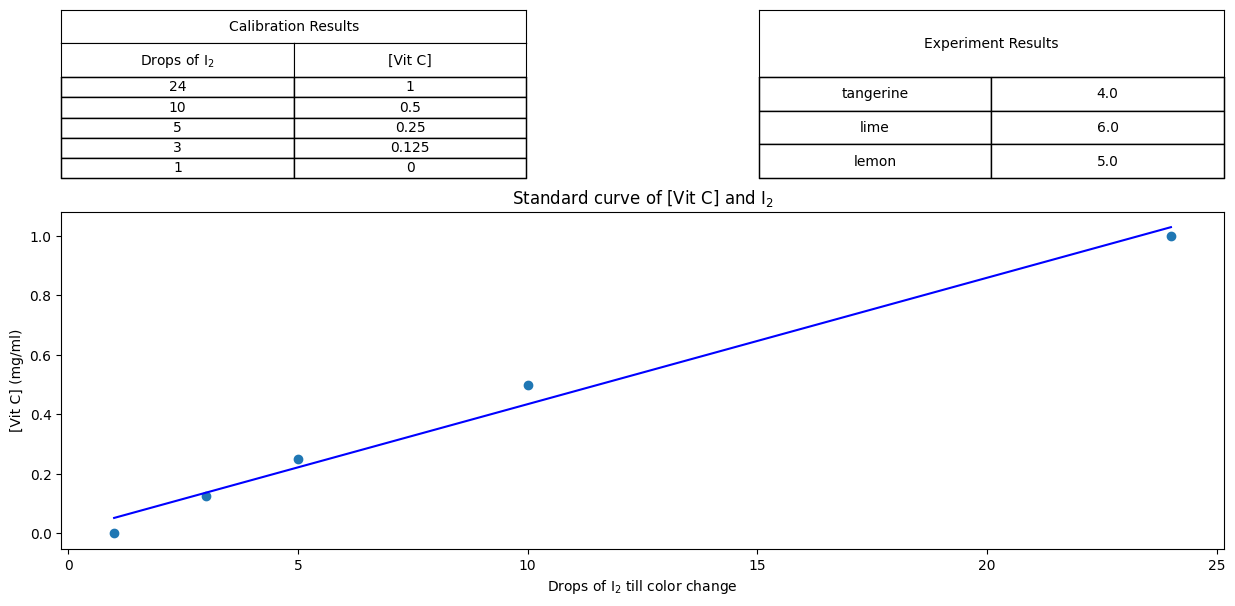


$$Standard\ Curve\ Equation: y = 0.0425(x) + 0.0095$$
$$R^{2} = 0.9859$$
**Determination of Vitamin C content in the samples with the above Equation:** $$Tangerine: 0.1795 = 0.0425(4.0) + 0.0095$$
$$Lime: 0.2645 = 0.0425(6.0) + 0.0095$$
$$Lemon: 0.222 = 0.0425(5.0) + 0.0095$$


In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd # data frame handling
import matplotlib.pyplot as plt # plotting & visuals
from IPython.display import Markdown as md # displaying equations and r^2


def format_axes(fig):
    for i, ax in enumerate(fig.axes):
        ax.tick_params(labelbottom=False, labelleft=False, labelright=False)
        ax.get_xaxis().set_ticks([])
        ax.get_yaxis().set_ticks([])


resultDf = pd.read_excel('./results.xlsx')
resultDf.fillna('', inplace=True)

drops_of_iodine = resultDf[resultDf.columns[0]]
vit_c = resultDf[resultDf.columns[1]]

cali_tab_cellText = []
for i in range(1, len(drops_of_iodine)):
    if not drops_of_iodine[i]:
        break
    cali_tab_cellText.append([drops_of_iodine[i], vit_c[i]])

expr_results_name = resultDf[resultDf.columns[3]]
expr_results_values = resultDf[resultDf.columns[4]]

expr_tab_cellText = []
for i in range(len(expr_results_values)):
    if not expr_results_values[i]: break
    expr_tab_cellText.append([expr_results_name[i], expr_results_values[i]])


fig = plt.figure(figsize=(15,7))
gs = fig.add_gridspec(5, 5, wspace=0.0, hspace=0.0, height_ratios=[1, 1, 3, 1, 10])

ax1 = fig.add_subplot(gs[0, 0:2])
ax1.text(0.5, 0.5, 'Calibration Results', va="center", ha="center")
ax2 = fig.add_subplot(gs[1, 0])
ax2.text(0.5, 0.5, 'Drops of I$_{2}$', va="center", ha="center")
ax3 = fig.add_subplot(gs[1, 1])
ax3.text(0.5, 0.5, "[Vit C]", va="center", ha="center")
ax5 = fig.add_subplot(gs[2, :2])
table = ax5.table(cellText=cali_tab_cellText, cellLoc='center', bbox=[0, 0, 1, 1])

ax4 = fig.add_subplot(gs[0:2, 3:])
ax4.text(0.5, 0.5, 'Experiment Results', va="center", ha="center")
ax6 = fig.add_subplot(gs[2, 3:])
table = ax6.table(cellText=expr_tab_cellText, cellLoc='center', bbox=[0, 0, 1, 1])

format_axes(fig)

# graph the standard curve
x_values = drops_of_iodine[1:]
y_label = '[Vit C] (mg/ml)'

y_values = vit_c[1:]
x_label = 'Drops of I$_{2}$ till color change'

ax7 = fig.add_subplot(gs[4, :])
ax7.scatter(x_values, y_values)
ax7.set_xlabel(x_label)
ax7.set_ylabel(y_label)
ax7.set_title('Standard curve of [Vit C] and I$_{2}$')

# calculating the line of regression & R^2
linearReg = LinearRegression()  # papering the model
x_values = x_values.values.reshape(-1, 1) # x values needs to be reshaped to 2D array for what ever reason
linearReg.fit(x_values, y_values)

prediction = linearReg.predict(x_values) # predicting y values as x is the input

ax7.plot(x_values, prediction, color='blue')

plt.show() # render

# get the equation
slope = np.round(linearReg.coef_, 4)[0] #wired python, returning array for no reason
intercept = np.round(linearReg.intercept_, 4)
equation = lambda x='x', y='y': "%s = %s(%s) + %s" % (y, slope, x, intercept)

r_squared = np.round(linearReg.score(x_values, y_values), 4)

md('''
$$Standard\ Curve\ Equation: %s$$
$$R^{2} = %s$$
**Determination of Vitamin C content in the samples with the above Equation:** \
$$Tangerine: %s$$
$$Lime: %s$$
$$Lemon: %s$$
''' % (equation(), r_squared, equation(4.0, 0.1795), equation(6.0, 0.2645), equation(5.0, 0.222)))


### Discussion

#### Statical Data Analysis

In [219]:
import statsmodels.api as sma #stats
import pandas as pd  # data frame handling
import scipy.stats as scs
# dumping stats data
from IPython.display import Markdown as md

# suppress  the warning as we don't have enough data
# import warnings 
# from statsmodels.tools.sm_exceptions import ValueWarning
# warnings.simplefilter('ignore', ValueWarning)

drops_I = [4, 6, 5]
vit_c = [0.1795, 0.2645, 0.222]

model_lm = scs.f_oneway(drops_I, vit_c)

p_value = model_lm[1]
f_value = model_lm[0]

I_sum = 0
for i in drops_I: I_sum += i
I_average = I_sum / len(drops_I)

C_sum = 0
for i in vit_c: C_sum += i
C_average = C_sum / len(vit_c)

I_variance = scs.variation(drops_I)
C_variance = scs.variation(vit_c)

md('''
#### One way ANOVA Results:  
**Summary**:  

| Name | Sum | Average | Variance |
| --- | --- | --- | --- |
| Drops of I₂ | %s | %s | %s |
| Vit C | %s | %s | %s |

P-Value: %s  
F-Value: %s  
''' % (I_sum, I_average, I_variance, C_sum, C_average, C_variance, p_value, f_value))



#### One way ANOVA Results:  
**Summary**:  

| Name | Sum | Average | Variance |
| --- | --- | --- | --- |
| Drops of I₂ | 15 | 5.0 | 0.16329931618554522 |
| Vit C | 0.666 | 0.222 | 0.15631128238481246 |

P-Value: 0.0011675741500513346  
F-Value: 68.36436885874905  


The P-Value is less than 0.05, showing that they's a statically significant Vitamin C difference between various samples. The amount of I $_{2}$ compared to Vitamin C is large. An average of 5 drops of Iodine corresponds to about 0.2 ml/mg of Vitamin C.

### Question

1. An antioxidant is a chemical or compound that can cause a redux reaction, specifically oxidation. These reactions create free radicals, that can cause chain reactions. It helps to prevent oxidation and preserve things longer. 

2. Oxidization agents could damage DNA, lipids and proteins and could cause cell malformation. 

3. A potential biological effect is that it can be an antioxidant against oxidization agents. It might be used as a food preservative or as an anti-toxins for toxins. 


### NGSS Standards Met

1. Developing and Using Models -- Use and represent data with mathematical, physical, simulated models to represent ideas and explanations. 
    - Made a standard curve and used least square to analyze data in this lab
2. Using Mathematics and Computational Thinking -- Using mathematical models and simulation to statically analyze data and recognizing relationships between data.
    - Used One-Way ANOVA to analyze the data and determine the relationship between various samples. 

#### Note: 
- To see more of the code/the ipynb file, please view github: https://github.com/Alvin-He/jupyter-notebooks/blob/main/Chem%20Honors/Vitamin%20C/vitaC.ipynb